# Importing basics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import ADASYN
import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\Data\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(r"C:\Users\Rahul\OneDrive\Desktop\AQI\Dataset\delhi_aqi.csv", parse_dates=["date"])

In [4]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


# Data Visualization

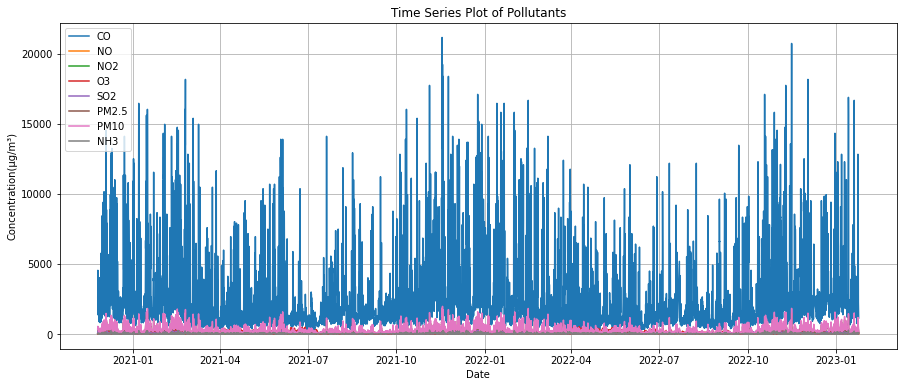

In [5]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Time Series Plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['co'], label='CO')
plt.plot(df.index, df['no'], label='NO')
plt.plot(df.index, df['no2'], label='NO2')
plt.plot(df.index, df['o3'], label='O3')
plt.plot(df.index, df['so2'], label='SO2')
plt.plot(df.index, df['pm2_5'], label='PM2.5')
plt.plot(df.index, df['pm10'], label='PM10')
plt.plot(df.index, df['nh3'], label='NH3')
plt.legend()
plt.title('Time Series Plot of Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration(µg/m³)')
plt.grid(True)
plt.show()


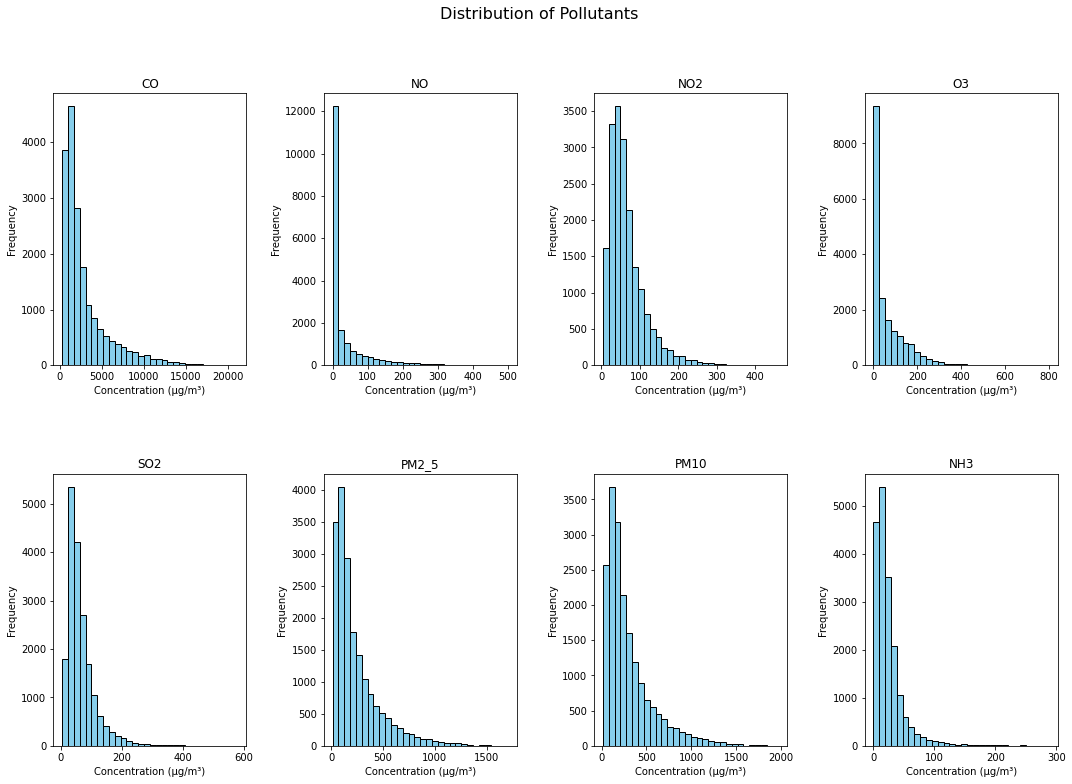

In [6]:
# Create subplots in a grid layout with adjusted spacing
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots

# List of pollutants
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Create histograms for each pollutant
for i in range(len(pollutants)):
    row = i // 4
    col = i % 4
    axes[row, col].hist(df[pollutants[i]], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(pollutants[i].upper())  # Set the title to the pollutant name in uppercase
    axes[row, col].set_xlabel('Concentration (µg/m³)')  # Include the unit in the x-axis label
    axes[row, col].set_ylabel('Frequency')


plt.suptitle('Distribution of Pollutants', fontsize=16)


plt.show()

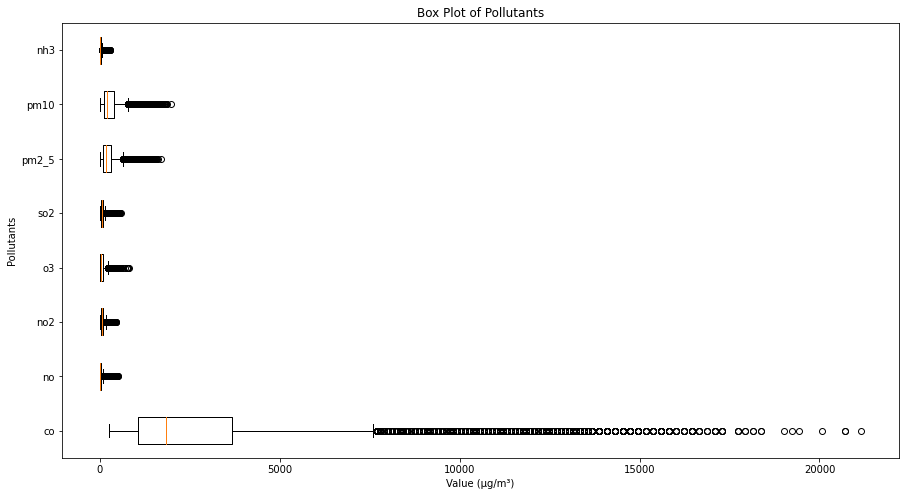

In [7]:
import matplotlib.pyplot as plt

# List of pollutants
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

plt.figure(figsize=(15, 8))

# Create a box plot for all pollutants
plt.boxplot(df[pollutants].values, vert=False)
plt.title('Box Plot of Pollutants')
plt.xlabel('Value (µg/m³)')
plt.ylabel('Pollutants')
plt.yticks(range(1, len(pollutants) + 1), pollutants)  # Label the y-axis ticks

plt.show()

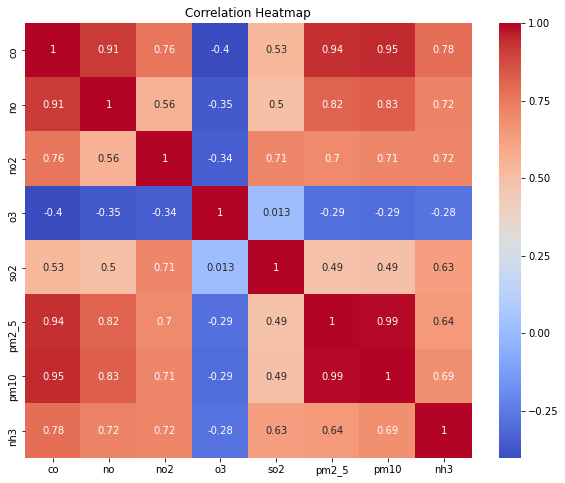

In [8]:
#Heatmap of Correlations
#To understand the correlation between different pollutants.
correlation_matrix = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Pre-Processing

In [9]:
from scipy.stats import mstats
df['co'] = mstats.winsorize(df['co'], limits=[0.05, 0.05])

In [10]:
df.isnull().sum()

co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [11]:
def preprocess_data(df):
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')

    # Compute the 24-hour rolling average for PM2.5, PM10, NO2, SO2, and NH3
    df['rolling_avg_pm2_5'] = df['pm2_5'].rolling(window='24H').mean()
    df['rolling_avg_pm10'] = df['pm10'].rolling(window='24H').mean()
    df['rolling_avg_no2'] = df['no2'].rolling(window='24H').mean()
    df['rolling_avg_so2'] = df['so2'].rolling(window='24H').mean()
    df['rolling_avg_nh3'] = df['nh3'].rolling(window='24H').mean()

    # Compute the 8-hour rolling average for CO and O3
    df['rolling_avg_co'] = df['co'].rolling(window='8H').mean()
    df['rolling_avg_o3'] = df['o3'].rolling(window='8H').mean()
    
    # Drop other columns
    columns_to_drop = ['co','no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    df = df.drop(columns=columns_to_drop, axis=1)

    return df

In [12]:
df = preprocess_data(df)

In [13]:
df

,rolling_avg_pm2_5,rolling_avg_pm10,rolling_avg_no2,rolling_avg_so2,rolling_avg_nh3,rolling_avg_co,rolling_avg_o3
date,,,,,,,
2020-11-25 01:00:00,364.610000,411.730000,70.600000,38.620000,28.630000,2616.880000,13.59000
2020-11-25 02:00:00,392.785000,448.970000,79.855000,46.490000,34.835000,3124.235000,6.96000
2020-11-25 03:00:00,416.416667,479.963333,86.596667,53.883333,39.603333,3595.986667,5.01000
2020-11-25 04:00:00,426.015000,493.472500,92.707500,59.962500,41.735000,3831.862500,5.36750
2020-11-25 05:00:00,430.440000,500.616000,97.746000,65.518000,42.710000,3941.344000,7.72800
...,...,...,...,...,...,...,...
2023-01-24 04:00:00,443.387500,560.873333,79.897500,66.708750,34.578750,3107.548750,4.98000
2023-01-24 05:00:00,446.260417,562.741250,80.126250,67.046250,34.198750,2623.558750,10.79125
2023-01-24 06:00:00,449.708750,565.067917,80.526250,67.672083,33.929583,2309.800000,17.85500


In [14]:
def feature_extraction(df):
    
    def calculate_aqi(Cp, BPlow, BPhigh, IPlow, IPhigh):
        return ((IPhigh - IPlow) / (BPhigh - BPlow)) * (Cp - BPlow) + IPlow

    def aqi_for_pollutant(concentration, breakpoints):
        for (clow, chigh, ilow, ihigh) in breakpoints:
            if clow <= concentration <= chigh:
                return calculate_aqi(concentration, clow, chigh, ilow, ihigh)
        return -1  
    
    # Breakpoints for NAQI
    PM10_breakpoints = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, float('inf'), 401, 500)]
    PM2_5_breakpoints = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, float('inf'), 401, 500)]
    NO2_breakpoints = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, float('inf'), 401, 500)]
    O3_breakpoints = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, float('inf'), 401, 500)]
    CO_breakpoints = [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, float('inf'), 401, 500)]
    SO2_breakpoints = [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300), (801, 1600, 301, 400), (1601, float('inf'), 401, 500)]

    # Calculate AQIs for each pollutant using the rolling average columns
    df['AQI_pm10'] = df['rolling_avg_pm10'].apply(lambda x: aqi_for_pollutant(x, PM10_breakpoints))
    df['AQI_pm2_5'] = df['rolling_avg_pm2_5'].apply(lambda x: aqi_for_pollutant(x, PM2_5_breakpoints))
    df['AQI_no2'] = df['rolling_avg_no2'].apply(lambda x: aqi_for_pollutant(x, NO2_breakpoints))
    df['AQI_o3'] = df['rolling_avg_o3'].apply(lambda x: aqi_for_pollutant(x, O3_breakpoints))
    df['AQI_co'] = (df['rolling_avg_co'] / 1000).apply(lambda x: aqi_for_pollutant(x, CO_breakpoints))  # Convert CO values from µg/m3 to mg/m3 for AQI calculation
    df['AQI_so2'] = df['rolling_avg_so2'].apply(lambda x: aqi_for_pollutant(x, SO2_breakpoints))

    # Determine overall AQI for each row
    df['Overall_AQI'] = df[['AQI_pm10', 'AQI_pm2_5', 'AQI_no2', 'AQI_o3', 'AQI_co', 'AQI_so2']].max(axis=1)

    return df


In [15]:
df = feature_extraction(df)
df.reset_index(drop=True, inplace=True)

In [16]:
df

,rolling_avg_pm2_5,rolling_avg_pm10,rolling_avg_no2,rolling_avg_so2,rolling_avg_nh3,rolling_avg_co,rolling_avg_o3,AQI_pm10,AQI_pm2_5,AQI_no2,AQI_o3,AQI_co,AQI_so2,Overall_AQI
0,364.610000,411.730000,70.600000,38.620000,28.630000,2616.880000,13.59000,377.104684,401.0,88.189744,13.59000,107.477357,48.275000,401.0
1,392.785000,448.970000,79.855000,46.490000,34.835000,3124.235000,6.96000,401.000000,401.0,99.817821,6.96000,113.835350,57.897692,401.0
2,416.416667,479.963333,86.596667,53.883333,39.603333,3595.986667,5.01000,401.000000,401.0,106.596667,5.01000,119.747175,67.186752,401.0
3,426.015000,493.472500,92.707500,59.962500,41.735000,3831.862500,5.36750,401.000000,401.0,112.707500,5.36750,122.703087,74.824679,401.0
4,430.440000,500.616000,97.746000,65.518000,42.710000,3941.344000,7.72800,401.000000,401.0,117.746000,7.72800,124.075070,81.804667,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,443.387500,560.873333,79.897500,66.708750,34.578750,3107.548750,4.98000,401.000000,401.0,99.871218,4.98000,113.626244,83.300737,401.0
18772,446.260417,562.741250,80.126250,67.046250,34.198750,2623.558750,10.79125,401.000000,401.0,-1.000000,10.79125,107.561053,83.724776,401.0
18773,449.708750,565.067917,80.526250,67.672083,33.929583,2309.800000,17.85500,401.000000,401.0,-1.000000,17.85500,103.629139,84.511079,401.0
18774,451.686667,566.309167,81.640000,70.135833,33.771250,2039.433750,26.79500,401.000000,401.0,101.640000,26.79500,-1.000000,87.606560,401.0


In [17]:
def assign_aqi_category(df):

    def categorize(overall_aqi):
        if 0 <= overall_aqi <= 50:
            return "Good"
        elif 51 <= overall_aqi <= 100:
            return "Satisfactory"
        elif 101 <= overall_aqi <= 200:
            return "Moderately Polluted"
        elif 201 <= overall_aqi <= 300:
            return "Poor"
        elif 301 <= overall_aqi <= 400:
            return "Very Poor"
        else:
            return "Severe"

    df['AQI_Category'] = df['Overall_AQI'].apply(categorize)
    return df


In [18]:
df = assign_aqi_category(df)

In [19]:
df

,rolling_avg_pm2_5,rolling_avg_pm10,rolling_avg_no2,rolling_avg_so2,rolling_avg_nh3,rolling_avg_co,rolling_avg_o3,AQI_pm10,AQI_pm2_5,AQI_no2,AQI_o3,AQI_co,AQI_so2,Overall_AQI,AQI_Category
0,364.610000,411.730000,70.600000,38.620000,28.630000,2616.880000,13.59000,377.104684,401.0,88.189744,13.59000,107.477357,48.275000,401.0,Severe
1,392.785000,448.970000,79.855000,46.490000,34.835000,3124.235000,6.96000,401.000000,401.0,99.817821,6.96000,113.835350,57.897692,401.0,Severe
2,416.416667,479.963333,86.596667,53.883333,39.603333,3595.986667,5.01000,401.000000,401.0,106.596667,5.01000,119.747175,67.186752,401.0,Severe
3,426.015000,493.472500,92.707500,59.962500,41.735000,3831.862500,5.36750,401.000000,401.0,112.707500,5.36750,122.703087,74.824679,401.0,Severe
4,430.440000,500.616000,97.746000,65.518000,42.710000,3941.344000,7.72800,401.000000,401.0,117.746000,7.72800,124.075070,81.804667,401.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18771,443.387500,560.873333,79.897500,66.708750,34.578750,3107.548750,4.98000,401.000000,401.0,99.871218,4.98000,113.626244,83.300737,401.0,Severe
18772,446.260417,562.741250,80.126250,67.046250,34.198750,2623.558750,10.79125,401.000000,401.0,-1.000000,10.79125,107.561053,83.724776,401.0,Severe
18773,449.708750,565.067917,80.526250,67.672083,33.929583,2309.800000,17.85500,401.000000,401.0,-1.000000,17.85500,103.629139,84.511079,401.0,Severe
18774,451.686667,566.309167,81.640000,70.135833,33.771250,2039.433750,26.79500,401.000000,401.0,101.640000,26.79500,-1.000000,87.606560,401.0,Severe


In [20]:
value_counts = df['AQI_Category'].value_counts()
print(value_counts)

Severe                 6769
Very Poor              6154
Poor                   2381
Moderately Polluted    2269
Satisfactory           1175
Good                     28
Name: AQI_Category, dtype: int64


In [21]:
X = df[['rolling_avg_pm2_5', 'rolling_avg_pm10', 'rolling_avg_no2', 'rolling_avg_so2', 'rolling_avg_nh3', 'rolling_avg_co']]
y = df['AQI_Category']



In [22]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X, y)

In [23]:
y_resampled.value_counts()

Satisfactory           6865
Good                   6773
Severe                 6769
Very Poor              6538
Moderately Polluted    6524
Poor                   6493
Name: AQI_Category, dtype: int64

# Model Training

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate and print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 94.33%
Classification Report:
                     precision    recall  f1-score   support

               Good       0.96      1.00      0.98      1349
Moderately Polluted       0.88      0.87      0.87      1341
               Poor       0.92      0.91      0.92      1246
       Satisfactory       0.94      0.91      0.92      1397
             Severe       0.99      1.00      0.99      1371
          Very Poor       0.96      0.97      0.97      1289

           accuracy                           0.94      7993
          macro avg       0.94      0.94      0.94      7993
       weighted avg       0.94      0.94      0.94      7993



F1 Score: 0.94


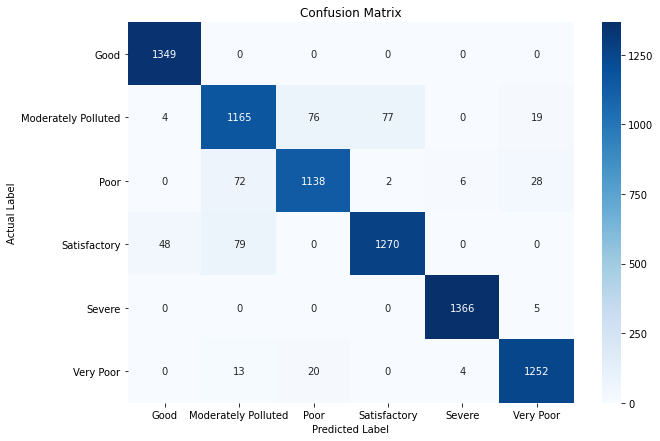

In [27]:
# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  

# Print F1 Score
print(f"F1 Score: {f1:.2f}")

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Testing

In [28]:
values = [364.61, 411.73, 70.6, 38.62, 28.63, 2616.88]

values_reshaped = [values]
values_scaled = scaler.transform(values_reshaped)

predicted_category = mlp.predict(values_scaled)

print(f"The predicted AQI category for the provided values is: {predicted_category[0]}")

The predicted AQI category for the provided values is: Severe
